In [78]:
import numpy as np
from scipy.signal import freqz
import matplotlib.pyplot as plt
from math import pi, acos, exp


In [79]:

sample = 100 #ms

tau = 300 #ms
alpha = 1-exp(-sample/tau)
#alpha = 0.25

In [80]:
a = [1, alpha-1]
b = [alpha]

fs = 1/(sample/1000)

x = (alpha**2 + 2*alpha - 2) / (2*alpha - 2)
w_c = acos(x)*(fs/(2*pi))                          # Calculate the cut-off frequency

w, h = freqz(b, a, fs=fs)                     # Calculate the frequency response


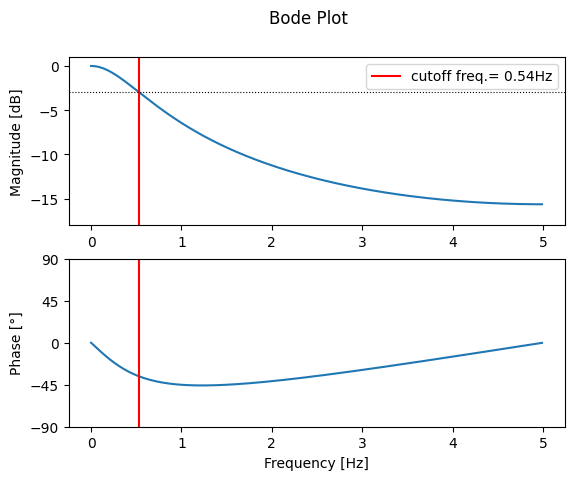

In [81]:
# Plot the results

plt.subplot(2, 1, 1)                   # Plot the amplitude response
plt.suptitle('Bode Plot')            
plt.plot(w, 20 * np.log10(abs(h)))     # Convert to dB
plt.ylabel('Magnitude [dB]')
#plt.xlim(0, pi)
plt.ylim(-18, 1)
plt.axvline(w_c, color='red', label="cutoff freq.= {:.2f}Hz".format(w_c))
plt.axhline(-3, linewidth=0.8, color='black', linestyle=':')
plt.legend()

plt.subplot(2, 1, 2)                   # Plot the phase response
plt.plot(w, 180 * np.angle(h) / pi)    # Convert argument to degrees
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [°]')
#plt.xlim(0, pi)
plt.ylim(-90, 90)
plt.yticks([-90, -45, 0, 45, 90])
plt.axvline(w_c, color='red')
plt.show()